In [7]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [8]:
df_basics = pl.read_parquet(
    "C:/Users/leonardo.ferraz/Documents/Leonardo Ferraz/BigDataSenac/projetofinal/parquets/title.basics_POLARS.parquet"
)

df_ratings = pl.read_parquet(
    "C:/Users/leonardo.ferraz/Documents/Leonardo Ferraz/BigDataSenac/projetofinal/parquets/title.ratings_POLARS.parquet"
)


In [9]:
df_basics = df_basics.select([
    "tconst",
    "startYear",
    "genres"
])

df_ratings = df_ratings.select([
    "tconst",
    "numVotes"
])


In [10]:
df = df_ratings.join(
    df_basics,
    on="tconst",
    how="inner"
)


In [11]:
df = df.filter(
    (pl.col("startYear").is_not_null()) &
    (pl.col("numVotes").is_not_null()) &
    (pl.col("genres").is_not_null())
)


In [32]:
df_action = df.filter(
    pl.col("genres").str.contains("Action")
)


In [33]:
df_year = (
    df_action
    .group_by("startYear")
    .agg(
        pl.col("numVotes").mean().alias("avg_votes")
    )
    .sort("startYear")
)


In [34]:
df_year_pd = df_year.to_pandas()


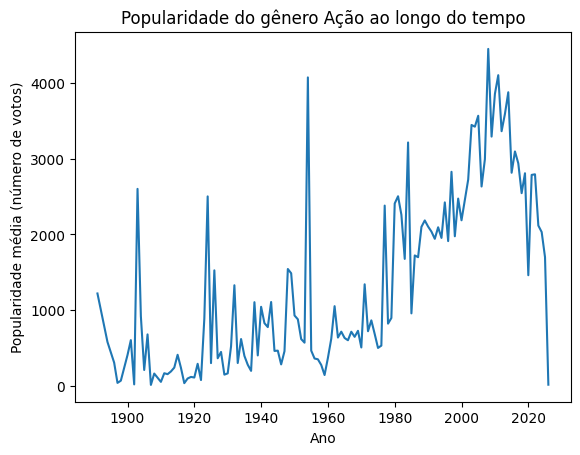

In [35]:
plt.figure()
plt.plot(df_year_pd["startYear"], df_year_pd["avg_votes"])
plt.xlabel("Ano")
plt.ylabel("Popularidade média (número de votos)")
plt.title("Popularidade do gênero Ação ao longo do tempo")
plt.show()


In [36]:
X = df_year_pd[["startYear"]]
y = df_year_pd["avg_votes"]


In [37]:
model = LinearRegression()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
coef = model.coef_[0]
print(f"Coeficiente angular da regressão: {coef}")


Coeficiente angular da regressão: 21.979493470061147


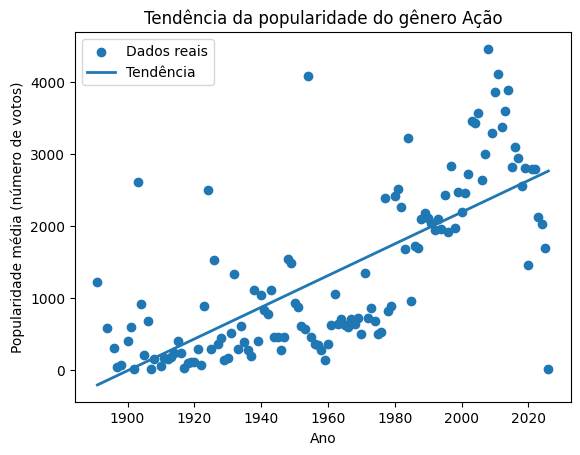

In [39]:
y_pred = model.predict(X)

plt.figure()
plt.scatter(df_year_pd["startYear"], df_year_pd["avg_votes"], label="Dados reais")
plt.plot(df_year_pd["startYear"], y_pred, label="Tendência", linewidth=2)
plt.xlabel("Ano")
plt.ylabel("Popularidade média (número de votos)")
plt.title("Tendência da popularidade do gênero Ação")
plt.legend()
plt.show()


In [40]:
anos_futuros = np.array([[2026], [2027], [2028], [2029], [2030]])
previsao = model.predict(anos_futuros)

df_previsao = pd.DataFrame({
    "Ano": anos_futuros.flatten(),
    "Popularidade Prevista (média de votos)": previsao.round(2)
})

print("\nPREVISÃO DA POPULARIDADE DO GÊNERO AÇÃO\n")
print(df_previsao.to_string(index=False))

# Análise automática da tendência
variacao = previsao[-1] - previsao[0]

print("\nINTERPRETAÇÃO:")
if variacao > 0:
    print("--------> Tendência de CRESCIMENTO da popularidade ao longo do tempo.")
elif variacao < 0:
    print("<-------- Tendência de QUEDA da popularidade ao longo do tempo.")
else:
    print("|| Tendência de ESTABILIDADE da popularidade.")



PREVISÃO DA POPULARIDADE DO GÊNERO AÇÃO

 Ano  Popularidade Prevista (média de votos)
2026                                 2759.93
2027                                 2781.91
2028                                 2803.89
2029                                 2825.87
2030                                 2847.85

INTERPRETAÇÃO:
--------> Tendência de CRESCIMENTO da popularidade ao longo do tempo.


c:\Users\leonardo.ferraz\Documents\Leonardo Ferraz\modulo02venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
